**Import Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

**Importing Boston House Price Dataset**

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
# Loading the dataset to pandas dataframe
house_data = pd.DataFrame(data)

# Print the first five rows of the dataframe
house_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**Data Preprocessing**


Data preprocessing transforms the data into a format that is more easily and effectively processed in machine learning tasks.

In [ ]:
#Add target to the dataset
house_data['price']=target

In [ ]:
#check rows and columns in the dataset
house_data.shape

(506, 14)

In [ ]:
house_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Now check if there is any missing data in the data set
house_data.isnull().sum()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
price    0
dtype: int64

Since there is no missing data in the dataset

In [ ]:
#Statisticsl measures of the dataset
house_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Understing the correlation between various features and the target

Positive Correlation

Negative Correlation

<Axes: >

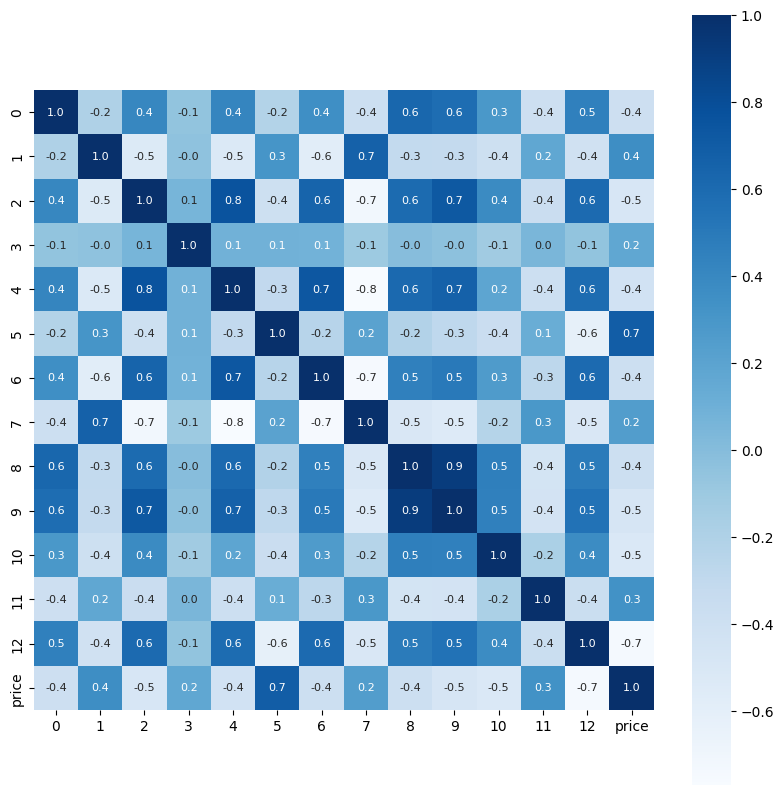

In [ ]:
correlation = house_data.corr()

#Constructing the heatmap to understand correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

**Separating data and labels**

X: Add all of the Data's features to the X variable. To accomplish this, we must remove the label column from the data and store the remaining columns as X variables. We can remove label column from the data by using the panda's drop function. This function takes the name of the column you wish to remove and the axis. Axis 0 leads to dropping rows, while axis 1 drops columns.

Y: Store label of the data to the variable Y

In [ ]:
X = pd.DataFrame(data)
Y = pd.DataFrame(target)

In [ ]:
print(X)
print(Y)

          0     1      2    3      4      5     6       7    8      9     10  \
0    0.00632  18.0   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1    0.02731   0.0   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2    0.02729   0.0   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3    0.03237   0.0   2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4    0.06905   0.0   2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   
..       ...   ...    ...  ...    ...    ...   ...     ...  ...    ...   ...   
501  0.06263   0.0  11.93  0.0  0.573  6.593  69.1  2.4786  1.0  273.0  21.0   
502  0.04527   0.0  11.93  0.0  0.573  6.120  76.7  2.2875  1.0  273.0  21.0   
503  0.06076   0.0  11.93  0.0  0.573  6.976  91.0  2.1675  1.0  273.0  21.0   
504  0.10959   0.0  11.93  0.0  0.573  6.794  89.3  2.3889  1.0  273.0  21.0   
505  0.04741   0.0  11.93  0.0  0.573  6.030  80.8  2.5050  1.0  273.0  21.0   

         11    12  
0    396.90  4.98  

**Splitting Data into Training data and Testing data**

**Train Test Split:** Split arrays or matrices into random train and test subsets.

Spliting data into four variables X_train, X_text, Y_train, Y_test

The X_train variable will hold all of the training data, and the Y_train variable will have the label of the X_tarin data.

Data for evoluation will be store in the X_test label of X_test data will store in the Y_test variable.

---

**test-size:** it defines the ratio of data which divide into traning and testing data.

0.1 = 10% data for testing and rest 90% data for traning

0.2 = 20% data for testing and rest 80% data for traning

---

**Stratify:**  This will be used by the train_test_split() function to ensure that both the train and test sets have the proportion of examples in each class that is present in the provided “y” array.Like in this model we use Stratify = Y as it divide equal 1 and 0 to the train and test data

**Random State:** The random state hyperparameter in the train_test_split() function controls the shuffling process. With random_state=None , we get different train and test sets across different executions and the shuffling process is out of control. With random_state=0 or 1 or 2, we get the same train and test sets across different executions.


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


**Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Model Training**

First we are using Linear Regression for this model

Second we are using XGBRegressor

and then check which model has higher accuracy

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

#train model
reg.fit(X_train, Y_train)

LinearRegression()

Evaluation for first Model i.e. Linear Regression

In [ ]:
#Prediction on training data
train_data = reg.predict(X_train)
score_1 = metrics.r2_score(Y_train, train_data)


#Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, train_data)

print("R squre Error: ", score_1)
print("Mean Absolute Error: ", score_2)

R squre Error:  0.7285831776605591
Mean Absolute Error:  3.384457539916795


In [ ]:
#Prediction on test data
test_data = reg.predict(X_test)
score_1 = metrics.r2_score(Y_test, test_data)


#Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data)

print("R squre Error: ", score_1)
print("Mean Absolute Error: ", score_2)

R squre Error:  0.7789207451814419
Mean Absolute Error:  3.113043746893426


Evaluation for Second Model i.e. XGBoost

Read about XGBoost: https://www.geeksforgeeks.org/xgboost/

In [ ]:
model = XGBRegressor()

#train model
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
#Prediction on training data
train_data = model.predict(X_train)
score_1 = metrics.r2_score(Y_train, train_data)


#Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, train_data)

print("R squre Error: ", score_1)
print("Mean Absolute Error: ", score_2)

R squre Error:  0.9999948236320982
Mean Absolute Error:  0.0145848437110976


In [ ]:
#Prediction on test data
test_data = model.predict(X_test)
score_1 = metrics.r2_score(Y_test, test_data)


#Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data)

print("R squre Error: ", score_1)
print("Mean Absolute Error: ", score_2)

R squre Error:  0.8757242820183986
Mean Absolute Error:  2.232154156179989


**Model Score**

**Linear Regression**

R squre Error:  0.7789207451814419
Mean Absolute Error:  3.113043746893426

**XGBRegressor**

R squre Error:  0.8757242820183986
Mean Absolute Error:  2.232154156179989

So it is clear that XGBRegressor gives good score than Linear Regression. So XGBRegressor is best fit for this model

**Visualizing the actual prices and predicted prices**

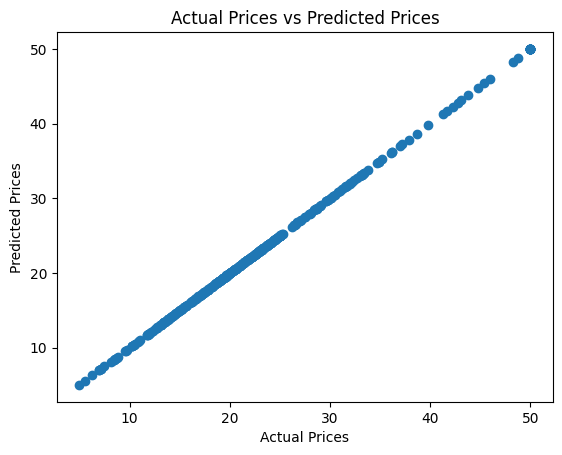

In [ ]:
plt.scatter(Y_train, train_data)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

As we can see in the above image Actual Prices and Predicted Prices are very close to each other which means Predictied value is very similer to the actual value